In [1]:
# Import Dependencies
import pandas as pd
from pathlib import Path
import numpy as np
from matplotlib import pyplot as plt
from scipy.stats import linregress
import scipy.stats as st

# File to Load
state_and_county_variables_values = Path("/Users/kelcigriffin/Downloads/FoodEnvironmentAtlas/StateAndCountyData.csv")
Population_Data = Path("/Users/kelcigriffin/Downloads/FoodEnvironmentAtlas/SupplementalDataCounty.csv")

# Read the modified state_and_county csv and store into Pandas DataFrame
Population_Data_df = pd.read_csv(Population_Data, encoding="utf-8")
state_and_county_df = pd.read_csv(state_and_county_variables_values, encoding="utf-8")
state_and_county_df.head()

georgia_county_filter = state_and_county_df['State']== 'GA'
GAcounties = state_and_county_df.loc[georgia_county_filter, ['County', 'Variable_Code', 'Value']]
GA_Population_Data_df = Population_Data_df.loc[georgia_county_filter, ['County', 'Variable_Code', 'Value']]
GA_Population_Data_df.head()
GAcounties.head()

,County,Variable_Code,Value
15864,Appling,LACCESS_POP10,3655.485669
15865,Appling,LACCESS_POP15,3671.279857
15866,Appling,PCH_LACCESS_POP_10_15,0.432068
15867,Appling,PCT_LACCESS_POP10,20.045436
15868,Appling,PCT_LACCESS_POP15,20.132046


In [2]:
#"Population, low access to store, 2015",Access and Proximity to Grocery Store,ACCESS,Overall,LACCESS_POP15,CNTY10,Count
#"Poverty rate, 2015",Socioeconomic Characteristics,SOCIOECONOMIC,Income Level,POVRATE15,CNTY10,Percent

#Make a Clean DataFrame with Variables
Poverty_Rate_15 = GAcounties[(GAcounties["Variable_Code"] == "POVRATE15")]
Lack_of_access15 = GAcounties[(GAcounties["Variable_Code"] == "LACCESS_POP15")]

# Group by `County'
Poverty_Rate_15_Count = Poverty_Rate_15.groupby(["County"]).sum()["Value"]
Lack_of_access15_Count = Lack_of_access15.groupby(["County"]).sum()["Value"]

# Combine each of the scores above into single DataFrame called `math_scores_by_grade`
Poverty_vs_Lack_of_Access = pd.DataFrame({"Poverty Rate in 2015": Poverty_Rate_15_Count,
                                          "Population with low access to store, 2015": Lack_of_access15_Count}) 

# Display the DataFrame
Clean_Poverty_vs_Lack_of_Access = Poverty_vs_Lack_of_Access.dropna()
Clean_Poverty_vs_Lack_of_Access

,Poverty Rate in 2015,"Population with low access to store, 2015"
County,,
Appling,22.5,3671.279857
Atkinson,26.9,1919.599016
Bacon,23.9,1369.729366
Baker,28.7,2616.917116
Baldwin,26.0,7587.250750
...,...,...
Whitfield,15.3,23220.297310
Wilcox,30.4,72.807531
Wilkes,22.9,1963.798339


In [8]:
#Children Food Access DataFrame
# "Students eligible for free lunch (%), 2015",Food Assistance,ASSISTANCE,National School Lunch Program,PCT_FREE_LUNCH15,CNTY10,Percent
# "Children, low access to store (%), 2015",Access and Proximity to Grocery Store,ACCESS,Demographics,PCT_LACCESS_CHILD15,CNTY10,Percent
# "Child poverty rate, 2015",Socioeconomic Characteristics,SOCIOECONOMIC,Income Level,CHILDPOVRATE15,CNTY10,Percent


#Collect Variables for DataFrame - Vulnerable Age Groups
Students_FL = GAcounties[(GAcounties["Variable_Code"] == "PCT_FREE_LUNCH15")]
# Children_LAS = GAcounties[(GAcounties["Variable_Code"] == "PCT_LACCESS_CHILD15")]
# ChildPOVRate = GAcounties[(GAcounties["Variable_Code"] == "CHILDPOVRATE15")]
reduced_lunch = GAcounties[(GAcounties["Variable_Code"]=="PCT_REDUCED_LUNCH15")]
poverty_rate = GAcounties[(GAcounties["Variable_Code"]=="POVRATE15")]

# #Group by County
Students_FL_Count = Students_FL.groupby(["County"]).sum()["Value"]
poverty_rate_count = poverty_rate.groupby(["County"]).sum()["Value"]


#Identifying vulnerable age groups with low access to food
school_lunch_df = pd.DataFrame({"Students Eligble for Free Lunch": Students_FL_Count,
                            "Poverty Rate": poverty_rate_count})
clean_lunch_df = school_lunch_df.dropna()

The r-squared is: 0.6977053678306705


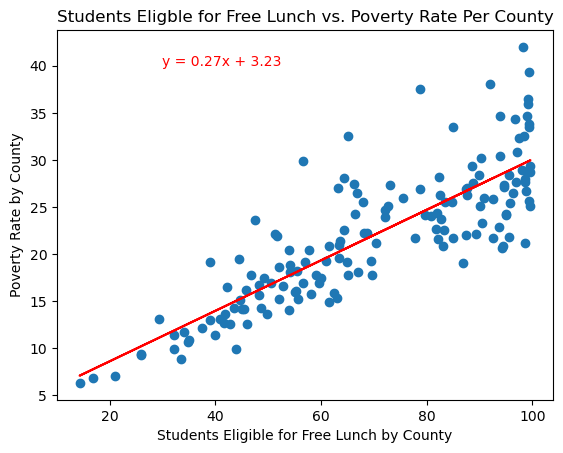

In [9]:
# Create a scatter plot which compares Child Poverty Rate to Students Eligible for Free Lunch
x_values = clean_lunch_df['Students Eligble for Free Lunch']
y_values = clean_lunch_df['Poverty Rate']

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(30,40),fontsize=10,color="red")
plt.xlabel('Students Eligible for Free Lunch by County')
plt.ylabel('Poverty Rate by County')
plt.title("Students Eligble for Free Lunch vs. Poverty Rate Per County")
print(f"The r-squared is: {rvalue**2}")